#**Data science/data analysis**

# # Health care insurance analysis
#Job Readiness project_1

In [124]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [125]:
#import the datasets
hospitalisation_details = pd.read_csv("/content/Hospitalisation details.csv")
medical_details = pd.read_csv("/content/Medical Examinations.csv")
customer_name = pd.read_excel("/content/Names.xlsx")

In [126]:
hospitalisation_details.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013


In [127]:
hospitalisation_details.shape

(2343, 9)

In [128]:
medical_details.head(5)

,Customer ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
0,Id1,47.410,7.47,No,No,No,No major surgery,yes
1,Id2,30.360,5.77,No,No,No,No major surgery,yes
2,Id3,34.485,11.87,yes,No,No,2,yes
3,Id4,38.095,6.05,No,No,No,No major surgery,yes
4,Id5,35.530,5.45,No,No,No,No major surgery,yes


In [129]:
medical_details.shape

(2335, 8)

In [130]:
customer_name.head()

,Customer ID,name
0,Id1,"Hawks, Ms. Kelly"
1,Id2,"Lehner, Mr. Matthew D"
2,Id3,"Lu, Mr. Phil"
3,Id4,"Osborne, Ms. Kelsey"
4,Id5,"Kadala, Ms. Kristyn"


In [131]:
customer_name.shape

(2335, 2)

# #  # Project task: week 1
##1.Collate the files so that all the information is in one place

In [132]:
customer_df1 = pd.merge(customer_name, hospitalisation_details, on = "Customer ID")
customer_df1.head()

,Customer ID,name,year,month,date,children,charges,Hospital tier,City tier,State ID
0,Id1,"Hawks, Ms. Kelly",1968,Oct,12,0,63770.43,tier - 1,tier - 3,R1013
1,Id2,"Lehner, Mr. Matthew D",1977,Jun,8,0,62592.87,tier - 2,tier - 3,R1013
2,Id3,"Lu, Mr. Phil",1970,?,11,3,60021.40,tier - 1,tier - 1,R1012
3,Id4,"Osborne, Ms. Kelsey",1991,Jun,6,1,58571.07,tier - 1,tier - 3,R1024
4,Id5,"Kadala, Ms. Kristyn",1989,Jun,19,0,55135.40,tier - 1,tier - 2,R1012


In [133]:
final_df = pd.merge(customer_df1, medical_details, on = "Customer ID")
final_df.head()

,Customer ID,name,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
0,Id1,"Hawks, Ms. Kelly",1968,Oct,12,0,63770.43,tier - 1,tier - 3,R1013,47.410,7.47,No,No,No,No major surgery,yes
1,Id2,"Lehner, Mr. Matthew D",1977,Jun,8,0,62592.87,tier - 2,tier - 3,R1013,30.360,5.77,No,No,No,No major surgery,yes
2,Id3,"Lu, Mr. Phil",1970,?,11,3,60021.40,tier - 1,tier - 1,R1012,34.485,11.87,yes,No,No,2,yes
3,Id4,"Osborne, Ms. Kelsey",1991,Jun,6,1,58571.07,tier - 1,tier - 3,R1024,38.095,6.05,No,No,No,No major surgery,yes
4,Id5,"Kadala, Ms. Kristyn",1989,Jun,19,0,55135.40,tier - 1,tier - 2,R1012,35.530,5.45,No,No,No,No major surgery,yes


In [134]:
final_df.shape

(2335, 17)

##2. check for missing vlalues in the dataset

In [135]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2335 entries, 0 to 2334
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2335 non-null   object 
 1   name                    2335 non-null   object 
 2   year                    2335 non-null   object 
 3   month                   2335 non-null   object 
 4   date                    2335 non-null   int64  
 5   children                2335 non-null   int64  
 6   charges                 2335 non-null   float64
 7   Hospital tier           2335 non-null   object 
 8   City tier               2335 non-null   object 
 9   State ID                2335 non-null   object 
 10  BMI                     2335 non-null   float64
 11  HBA1C                   2335 non-null   float64
 12  Heart Issues            2335 non-null   object 
 13  Any Transplants         2335 non-null   object 
 14  Cancer history          2335 non-null   

In [136]:
final_df.dtypes.value_counts()

object     12
float64     3
int64       2
dtype: int64

In [137]:
#check for null values
final_df.isnull().sum()

Customer ID               0
name                      0
year                      0
month                     0
date                      0
children                  0
charges                   0
Hospital tier             0
City tier                 0
State ID                  0
BMI                       0
HBA1C                     0
Heart Issues              0
Any Transplants           0
Cancer history            0
NumberOfMajorSurgeries    0
smoker                    0
dtype: int64

There is no missing value in the dataset it is clear from the above code.
But there is some unusual value that we have to deal.

# 3. Find the percentage of rows that have trivial value (for example, ?), and delete such rows if they do not contain significant information

In [138]:
trivial_value = final_df[final_df.eq("?").any(1)]
trivial_value

,Customer ID,name,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
2,Id3,"Lu, Mr. Phil",1970,?,11,3,60021.40,tier - 1,tier - 1,R1012,34.485,11.87,yes,No,No,2,yes
169,Id170,"Torphy, Mr. Bobby",2000,Sep,5,1,37165.16,tier - 1,tier - 3,?,37.620,6.32,yes,yes,No,2,yes
559,Id560,"Pearlman, Mr. Oz",1994,Jul,1,3,17663.14,tier - 1,tier - 3,R1013,23.980,4.90,No,No,No,No major surgery,?
634,Id635,"Bruns, Mr. Zachary T",2004,Jul,17,0,15518.18,tier - 2,tier - 3,R1015,25.175,4.96,No,yes,No,1,?
1285,Id1286,"Ainsley, Ms. Katie M.",?,Dec,12,1,8547.69,tier - 2,tier - 1,R1013,29.370,8.01,yes,No,No,1,No
1288,Id1289,"Levine, Ms. Annie J.",?,Jul,24,0,8534.67,tier - 2,tier - 3,R1024,24.320,11.56,yes,No,No,1,No
1792,Id1793,"Capriolo, Mr. Michael",1995,Dec,1,3,4827.90,tier - 1,tier - 2,?,18.905,4.91,yes,No,No,1,No
2317,Id2318,"Gagnon, Ms. Candice M",1996,?,18,0,770.38,tier - 3,?,R1012,18.820,5.51,yes,No,No,No major surgery,No
2321,Id2322,"Street, Ms. Holly",2002,?,19,0,750.00,tier - 3,tier - 1,R1012,21.380,8.01,No,No,No,No major surgery,No
2323,Id2324,"Duffy, Ms. Meghan K",1999,Dec,26,0,700.00,?,tier - 3,R1013,22.240,5.04,No,No,No,No major surgery,No


In [139]:
trivial_value.shape

(10, 17)

In [140]:
#percentage of rows that contains trivial value
round(trivial_value.shape[0]/final_df.shape[0]*100,2)

0.43

#There is a total of 0.43% of rows that contains the trivial values

In [141]:
#drop all the trivial values
final_df.drop(final_df[final_df.eq("?").any(1)].index, axis = 0, inplace = True)

In [142]:
final_df.shape

(2325, 17)

#  4. Use the necessary transformation methods to deal with the nominal and ordinal categorical variables in the dataset

#first we deal with the nominal categorical variables

In [143]:
final_df["Heart Issues"].value_counts()

No     1405
yes     920
Name: Heart Issues, dtype: int64

In [144]:
final_df["Any Transplants"].value_counts()

No     2183
yes     142
Name: Any Transplants, dtype: int64

In [145]:
final_df["Cancer history"].value_counts()

No     1934
Yes     391
Name: Cancer history, dtype: int64

In [146]:
final_df["smoker"].value_counts()

No     1839
yes     486
Name: smoker, dtype: int64

In [147]:
#we have some categorical values so first of all we have to transform them by using label encoder
from sklearn.preprocessing import LabelEncoder

In [148]:
le = LabelEncoder()

In [149]:
final_df["Heart Issues"] = le.fit_transform(final_df["Heart Issues"])
final_df["Any Transplants"] = le.fit_transform(final_df["Any Transplants"])
final_df["Cancer history"] = le.fit_transform(final_df["Cancer history"])
final_df["smoker"] = le.fit_transform(final_df["smoker"])

In [150]:
final_df["Heart Issues"].value_counts()

0    1405
1     920
Name: Heart Issues, dtype: int64

In [151]:
final_df["Any Transplants"].value_counts()

0    2183
1     142
Name: Any Transplants, dtype: int64

In [152]:
final_df["Cancer history"].value_counts()

0    1934
1     391
Name: Cancer history, dtype: int64

In [153]:
final_df["smoker"].value_counts()

0    1839
1     486
Name: smoker, dtype: int64

In [154]:
final_df.head()

,Customer ID,name,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
0,Id1,"Hawks, Ms. Kelly",1968,Oct,12,0,63770.43,tier - 1,tier - 3,R1013,47.410,7.47,0,0,0,No major surgery,1
1,Id2,"Lehner, Mr. Matthew D",1977,Jun,8,0,62592.87,tier - 2,tier - 3,R1013,30.360,5.77,0,0,0,No major surgery,1
3,Id4,"Osborne, Ms. Kelsey",1991,Jun,6,1,58571.07,tier - 1,tier - 3,R1024,38.095,6.05,0,0,0,No major surgery,1
4,Id5,"Kadala, Ms. Kristyn",1989,Jun,19,0,55135.40,tier - 1,tier - 2,R1012,35.530,5.45,0,0,0,No major surgery,1
5,Id6,"Baker, Mr. Russell B.",1962,Aug,4,0,52590.83,tier - 1,tier - 3,R1011,32.800,6.59,0,0,0,No major surgery,1


#now we deal with ordinal categorical variables

In [155]:
def clean_ordinal_variable(val):
  return int(val.replace("tier", "").replace(" ","").replace("-", ""))

In [156]:
final_df["Hospital tier"] = final_df["Hospital tier"].map(clean_ordinal_variable)
final_df["City tier"] = final_df["City tier"].map(clean_ordinal_variable)

In [157]:
final_df["Hospital tier"].value_counts()

2    1334
3     691
1     300
Name: Hospital tier, dtype: int64

In [158]:
final_df["City tier"].value_counts()

2    807
3    789
1    729
Name: City tier, dtype: int64

In [159]:
final_df.head()

,Customer ID,name,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
0,Id1,"Hawks, Ms. Kelly",1968,Oct,12,0,63770.43,1,3,R1013,47.410,7.47,0,0,0,No major surgery,1
1,Id2,"Lehner, Mr. Matthew D",1977,Jun,8,0,62592.87,2,3,R1013,30.360,5.77,0,0,0,No major surgery,1
3,Id4,"Osborne, Ms. Kelsey",1991,Jun,6,1,58571.07,1,3,R1024,38.095,6.05,0,0,0,No major surgery,1
4,Id5,"Kadala, Ms. Kristyn",1989,Jun,19,0,55135.40,1,2,R1012,35.530,5.45,0,0,0,No major surgery,1
5,Id6,"Baker, Mr. Russell B.",1962,Aug,4,0,52590.83,1,3,R1011,32.800,6.59,0,0,0,No major surgery,1


#5. The dataset has State ID, which has around 16 states. All states are not represented in equal proportions in the data. Creating dummy variables for all regions may also result in too many insignificant predictors. Nevertheless, only R1011, R1012, and R1013 are worth investigating further. Create a suitable strategy to create dummy variables with these restraints.

In [160]:
final_df["State ID"].value_counts()

R1013    609
R1011    574
R1012    572
R1024    159
R1026     84
R1021     70
R1016     64
R1025     40
R1023     38
R1017     36
R1019     26
R1022     14
R1014     13
R1015     11
R1018      9
R1020      6
Name: State ID, dtype: int64

It is clear from the above code some of the state is worth investigator like R1013, R1012, R1011 and R1024.

In [161]:
dummies = pd.get_dummies(final_df["State ID"], prefix = "State ID")

In [162]:
dummies

,State ID_R1011,State ID_R1012,State ID_R1013,State ID_R1014,State ID_R1015,State ID_R1016,State ID_R1017,State ID_R1018,State ID_R1019,State ID_R1020,State ID_R1021,State ID_R1022,State ID_R1023,State ID_R1024,State ID_R1025,State ID_R1026
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2331,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2332,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2333,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [163]:
#lets consider only those state id which plays significant role in the dataset
dummy = dummies[['State ID_R1011', 'State ID_R1012', 'State ID_R1013']]
dummy

,State ID_R1011,State ID_R1012,State ID_R1013
0,0,0,1
1,0,0,1
3,0,0,0
4,0,1,0
5,1,0,0
...,...,...,...
2330,0,0,1
2331,0,0,1
2332,0,0,1
2333,0,0,1


In [164]:
final_df = pd.concat([final_df, dummy], axis = 1)

In [165]:
final_df.drop(['State ID'], inplace = True, axis = 1)

In [166]:
final_df.head()

,Customer ID,name,year,month,date,children,charges,Hospital tier,City tier,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,State ID_R1011,State ID_R1012,State ID_R1013
0,Id1,"Hawks, Ms. Kelly",1968,Oct,12,0,63770.43,1,3,47.410,7.47,0,0,0,No major surgery,1,0,0,1
1,Id2,"Lehner, Mr. Matthew D",1977,Jun,8,0,62592.87,2,3,30.360,5.77,0,0,0,No major surgery,1,0,0,1
3,Id4,"Osborne, Ms. Kelsey",1991,Jun,6,1,58571.07,1,3,38.095,6.05,0,0,0,No major surgery,1,0,0,0
4,Id5,"Kadala, Ms. Kristyn",1989,Jun,19,0,55135.40,1,2,35.530,5.45,0,0,0,No major surgery,1,0,1,0
5,Id6,"Baker, Mr. Russell B.",1962,Aug,4,0,52590.83,1,3,32.800,6.59,0,0,0,No major surgery,1,1,0,0


#6. The variable NumberOfMajorSurgeries also appears to have string values. Apply a suitable method to clean up this variable.

In [167]:
final_df['NumberOfMajorSurgeries'].value_counts()

No major surgery    1070
1                    961
2                    272
3                     22
Name: NumberOfMajorSurgeries, dtype: int64

The NumberOfMajorSurgeries variable contain string value no major Surgery that mean simpli is 0 surgery so we will replace this value into int value equal to zero.

In [168]:
final_df['NumberOfMajorSurgeries'] = final_df['NumberOfMajorSurgeries'].replace("No major surgery","0")

In [169]:
final_df['NumberOfMajorSurgeries'] = final_df['NumberOfMajorSurgeries'].astype(int)

In [170]:
final_df['NumberOfMajorSurgeries'].value_counts()

0    1070
1     961
2     272
3      22
Name: NumberOfMajorSurgeries, dtype: int64

#7. Age appears to be a significant factor in this analysis. Calculate the patients' ages based on their dates of birth.

In [171]:
final_df["year"] = pd.to_datetime(final_df["year"], format='%Y').dt.year
final_df["year"]

0       1968
1       1977
3       1991
4       1989
5       1962
        ... 
2330    1998
2331    1992
2332    1993
2333    1992
2334    1992
Name: year, Length: 2325, dtype: int64

In [172]:
final_df["month"] = pd.to_datetime(final_df["month"], format='%b').dt.month
final_df["month"]

0       10
1        6
3        6
4        6
5        8
        ..
2330     7
2331     9
2332     6
2333    11
2334     7
Name: month, Length: 2325, dtype: int64

In [173]:
final_df['DateInt'] = final_df["year"].astype(str)+final_df["month"].astype(str).str.zfill(2)+final_df["date"].astype(str).str.zfill(2)

In [174]:
final_df['DOB'] = pd.to_datetime(final_df.DateInt, format = "%Y%m%d")

In [175]:
final_df.drop(["DateInt"], inplace = True, axis = 1)

In [176]:
final_df.head()

,Customer ID,name,year,month,date,children,charges,Hospital tier,City tier,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,State ID_R1011,State ID_R1012,State ID_R1013,DOB
0,Id1,"Hawks, Ms. Kelly",1968,10,12,0,63770.43,1,3,47.410,7.47,0,0,0,0,1,0,0,1,1968-10-12
1,Id2,"Lehner, Mr. Matthew D",1977,6,8,0,62592.87,2,3,30.360,5.77,0,0,0,0,1,0,0,1,1977-06-08
3,Id4,"Osborne, Ms. Kelsey",1991,6,6,1,58571.07,1,3,38.095,6.05,0,0,0,0,1,0,0,0,1991-06-06
4,Id5,"Kadala, Ms. Kristyn",1989,6,19,0,55135.40,1,2,35.530,5.45,0,0,0,0,1,0,1,0,1989-06-19
5,Id6,"Baker, Mr. Russell B.",1962,8,4,0,52590.83,1,3,32.800,6.59,0,0,0,0,1,1,0,0,1962-08-04


In [177]:
import datetime as dt
current_date = dt.datetime.now()

In [178]:
final_df['age'] = (((current_date - final_df.DOB).dt.days)/365).astype(int)

In [179]:
final_df.head()

,Customer ID,name,year,month,date,children,charges,Hospital tier,City tier,BMI,...,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,State ID_R1011,State ID_R1012,State ID_R1013,DOB,age
0,Id1,"Hawks, Ms. Kelly",1968,10,12,0,63770.43,1,3,47.410,...,0,0,0,0,1,0,0,1,1968-10-12,54
1,Id2,"Lehner, Mr. Matthew D",1977,6,8,0,62592.87,2,3,30.360,...,0,0,0,0,1,0,0,1,1977-06-08,45
3,Id4,"Osborne, Ms. Kelsey",1991,6,6,1,58571.07,1,3,38.095,...,0,0,0,0,1,0,0,0,1991-06-06,31
4,Id5,"Kadala, Ms. Kristyn",1989,6,19,0,55135.40,1,2,35.530,...,0,0,0,0,1,0,1,0,1989-06-19,33
5,Id6,"Baker, Mr. Russell B.",1962,8,4,0,52590.83,1,3,32.800,...,0,0,0,0,1,1,0,0,1962-08-04,60


#8. The gender of the patient may be an important factor in determining the cost of hospitalization. The salutations in a beneficiary's name can be used to determine their gender. Make a new field for the beneficiary's gender.

In [180]:
def gender(val):
  if "Ms." in val:
    return 0
  else:
    return 1

the salutation (Ms.) denote the female and (Mr.) denote the male.

The gender will play the inportant role to predict the hospitalization cost so for model building we directly denote the gender by int.

Male = 1 & Female = 0

In [181]:
final_df["gender"] = final_df["name"].map(gender)

In [182]:
final_df.head()

,Customer ID,name,year,month,date,children,charges,Hospital tier,City tier,BMI,...,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,State ID_R1011,State ID_R1012,State ID_R1013,DOB,age,gender
0,Id1,"Hawks, Ms. Kelly",1968,10,12,0,63770.43,1,3,47.410,...,0,0,0,1,0,0,1,1968-10-12,54,0
1,Id2,"Lehner, Mr. Matthew D",1977,6,8,0,62592.87,2,3,30.360,...,0,0,0,1,0,0,1,1977-06-08,45,1
3,Id4,"Osborne, Ms. Kelsey",1991,6,6,1,58571.07,1,3,38.095,...,0,0,0,1,0,0,0,1991-06-06,31,0
4,Id5,"Kadala, Ms. Kristyn",1989,6,19,0,55135.40,1,2,35.530,...,0,0,0,1,0,1,0,1989-06-19,33,0
5,Id6,"Baker, Mr. Russell B.",1962,8,4,0,52590.83,1,3,32.800,...,0,0,0,1,1,0,0,1962-08-04,60,1


#9. You should also visualize the distribution of costs using a histogram, box and whisker plot, and swarm plot.

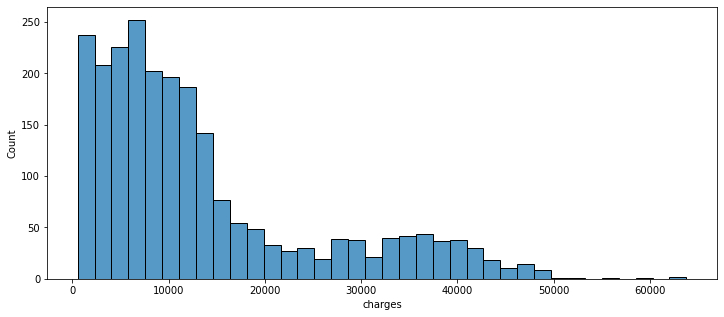

In [183]:
#lets make the histogram for the cost distribution
plt.figure(figsize = (12,5))
sns.histplot(final_df['charges'])
plt.show()

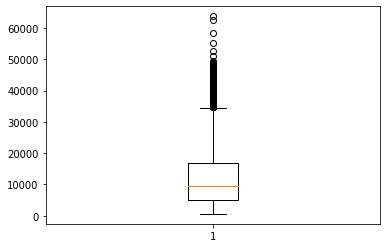

In [184]:
# visualize the cost distribution of the hospitals by box or whisker plot.
plt.boxplot(final_df['charges'])
plt.show()

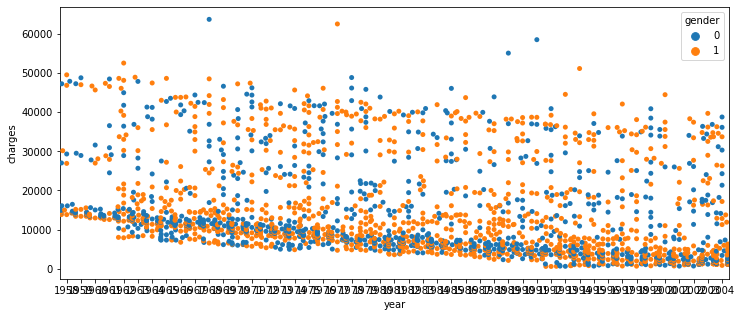

In [185]:
# visualize the cost distribution of the hospitals by swarm plot.
plt.figure(figsize = (12,5))
sns.swarmplot(x = 'year', y = 'charges', hue = "gender", data = final_df)
plt.show()

#10. State how the distribution is different across gender and tiers of hospitals

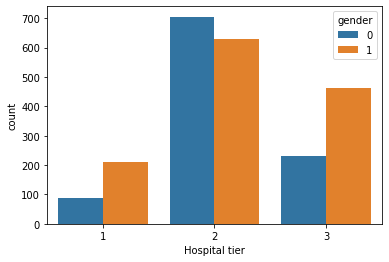

In [186]:
sns.countplot(data = final_df, x = 'Hospital tier', hue = 'gender')
plt.show()

From the above representation it is clear that the number of female in the tier 1 and 3 is half of the male just in tier 2 hospital female is little bit more as compare to male.

#11. Create a radar chart to showcase the median hospitalization cost for each tier of hospitals

In [187]:
print("median cost of tier 1 hospitals:", final_df[final_df["Hospital tier"]==1].charges.median())
print("median cost of tier 2 hospitals:", final_df[final_df["Hospital tier"]==2].charges.median())
print("median cost of tier 3 hospitals:", final_df[final_df["Hospital tier"]==3].charges.median())

median cost of tier 1 hospitals: 32097.434999999998
median cost of tier 2 hospitals: 7168.76
median cost of tier 3 hospitals: 10676.83


In [188]:
df = pd.DataFrame(dict(r = [32097.43, 7168.76,10676.83], theta = ['tier 1 hospital', 'tier 2 hospital', 'tier 3 hospital']))

In [189]:
df

,r,theta
0,32097.43,tier 1 hospital
1,7168.76,tier 2 hospital
2,10676.83,tier 3 hospital


In [190]:
import plotly.express as px
fig = px.line_polar(df, r='r', theta = 'theta', line_close = True)
fig.update_traces(fill = 'toself')
fig.show()

#12. Create a frequency table and a stacked bar chart to visualize the count of people in the different tiers of cities and hospitals

In [191]:
final_df["Hospital tier"].value_counts()


2    1334
3     691
1     300
Name: Hospital tier, dtype: int64

In [192]:
final_df["City tier"].value_counts()

2    807
3    789
1    729
Name: City tier, dtype: int64

In [193]:
city_freq = final_df["City tier"].value_counts().rename_axis('City&hospital_tier').reset_index(name = 'city_counts')

In [194]:
hospital_freq = final_df["Hospital tier"].value_counts().rename_axis('City&hospital_tier').reset_index(name = 'hospital_counts')

In [195]:
df = pd.merge(city_freq, hospital_freq, on = 'City&hospital_tier')

In [196]:
df

,City&hospital_tier,city_counts,hospital_counts
0,2,807,1334
1,3,789,691
2,1,729,300


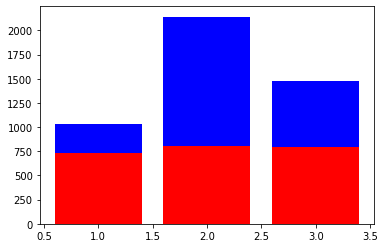

In [197]:
plt.bar(df["City&hospital_tier"], df["city_counts"], color='r')
plt.bar(df["City&hospital_tier"], df["hospital_counts"], bottom=df["city_counts"], color='b')
plt.show()

# #13. Test the following null hypotheses:
#a. The average hospitalization costs for the three types of hospitals are not significantly different
#b. The average hospitalization costs for the three types of cities are not significantly different
#c. The average hospitalization cost for smokers is not significantly different from the average cost for nonsmokers
#d. Smoking and heart issues are independent

In [198]:
from scipy.stats import ttest_1samp

#a. the average hospitalozation costs for the three types of hospitals are not significantly different

In [199]:
print("median cost of tier 1 hospital:", final_df[final_df["Hospital tier"]==1].charges.median())
print("median cost of tier 1 hospital:", final_df[final_df["Hospital tier"]==2].charges.median())
print("median cost of tier 1 hospital:", final_df[final_df["Hospital tier"]==3].charges.median())

median cost of tier 1 hospital: 32097.434999999998
median cost of tier 1 hospital: 7168.76
median cost of tier 1 hospital: 10676.83


#Interpretation
H0: the distributions of all samples are equal. || H1: the distributions of one or more samples are not equal

In [200]:
from scipy.stats import friedmanchisquare
data1 = [32097.43]
data2 = [7168.76]
data3 = [10676.83]
stat, p = friedmanchisquare(data1,data2,data3)
print('stat = %.3f, p=%.3f' % (stat, p))
if p > 0.05:
  print('Probably the same distribution')
else:
  print('Probably different distributions')


stat = 2.000, p=0.368
Probably the same distribution


#b. The average hospitalization costs for the three types of cities are not significantly different

In [201]:
print("median cost of tier 1 city:", final_df[final_df["City tier"]==1].charges.median())
print("median cost of tier 1 city:", final_df[final_df["City tier"]==2].charges.median())
print("median cost of tier 1 city:", final_df[final_df["City tier"]==3].charges.median())

median cost of tier 1 city: 10027.15
median cost of tier 1 city: 8968.33
median cost of tier 1 city: 9880.07


In [202]:
data1 = [10027.15]
data2 = [8968.33]
data3 = [9880.07]
stat, p = friedmanchisquare(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=2.000, p=0.368
Probably the same distribution


#c. The average hospitalization cost for smokers is not significantly different from the average cost for nonsmokers

In [203]:
print("median cost of smoker:", final_df[final_df["smoker"]==1].charges.median())
print("median cost of non smoker:", final_df[final_df["smoker"]==0].charges.median())

median cost of smoker: 34125.475
median cost of non smoker: 7537.16


In [204]:
from scipy.stats import kruskal
data1 = [34125.47]
data2 = [7537.16]
stat, p = kruskal(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=1.000, p=0.317
Probably the same distribution


#Interpretation
H0: the two samples are independent. H1: there is a dependency between the samples.

#d. Smoking and heart issues are independent


In [205]:
from scipy.stats import chi2_contingency
table = [[final_df["Heart Issues"].value_counts()],[final_df["smoker"].value_counts()]]
stat, p, dof, expected = chi2_contingency(table)
print('stat = %.3f, p = %.3f' % (stat,p))
if p> 0.05:
  print('Probably independent')
else:
  print('Probably dependent')
        

stat = 191.145, p = 0.000
Probably dependent


#**Machine Learning**

#Project Task: week 2

#1. Examine the correlation between predictors to identify highly correlated predictors. Use a heatmap to visualize this.

In [206]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 0 to 2334
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Customer ID             2325 non-null   object        
 1   name                    2325 non-null   object        
 2   year                    2325 non-null   int64         
 3   month                   2325 non-null   int64         
 4   date                    2325 non-null   int64         
 5   children                2325 non-null   int64         
 6   charges                 2325 non-null   float64       
 7   Hospital tier           2325 non-null   int64         
 8   City tier               2325 non-null   int64         
 9   BMI                     2325 non-null   float64       
 10  HBA1C                   2325 non-null   float64       
 11  Heart Issues            2325 non-null   int64         
 12  Any Transplants         2325 non-null   int64   

# In the data frame some of the column are not usable to model building so lets first drop all.
#then indentify the highly corelated predictor.

In [207]:
final_df.drop(["Customer ID", "name", "year", "month", "date", "DOB"], inplace = True, axis = 1)

In [208]:
final_df.shape

(2325, 16)

In [209]:
final_df.head()

,children,charges,Hospital tier,City tier,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,State ID_R1011,State ID_R1012,State ID_R1013,age,gender
0,0,63770.43,1,3,47.410,7.47,0,0,0,0,1,0,0,1,54,0
1,0,62592.87,2,3,30.360,5.77,0,0,0,0,1,0,0,1,45,1
3,1,58571.07,1,3,38.095,6.05,0,0,0,0,1,0,0,0,31,0
4,0,55135.40,1,2,35.530,5.45,0,0,0,0,1,0,1,0,33,0
5,0,52590.83,1,3,32.800,6.59,0,0,0,0,1,1,0,0,60,1


In [210]:
corr = final_df.corr()
corr

,children,charges,Hospital tier,City tier,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,State ID_R1011,State ID_R1012,State ID_R1013,age,gender
children,1.000000,0.055901,-0.052438,-0.015760,-0.005339,-0.101379,0.023984,-0.142040,-0.027880,-0.113161,0.017713,0.011666,0.005247,-0.013834,-0.005457,0.011205
charges,0.055901,1.000000,-0.446687,0.035300,0.346730,0.139697,0.049299,-0.127028,-0.022522,0.053308,0.838462,0.286956,-0.074636,-0.150634,0.304395,0.034069
Hospital tier,-0.052438,-0.446687,1.000000,-0.039755,-0.104771,0.057855,0.053376,0.011729,-0.021429,0.033230,-0.474077,-0.114685,0.020272,0.002455,0.133771,0.041261
City tier,-0.015760,0.035300,-0.039755,1.000000,0.038123,-0.005404,0.023152,0.002970,-0.018639,0.027937,0.032034,0.036049,-0.018253,0.002766,-0.008070,0.054073
BMI,-0.005339,0.346730,-0.104771,0.038123,1.000000,-0.006920,0.017129,0.015893,-0.020235,0.018851,0.107126,0.115671,0.017939,-0.208744,0.049260,0.079930
HBA1C,-0.101379,0.139697,0.057855,-0.005404,-0.006920,1.000000,0.007699,-0.159855,-0.170921,-0.091594,0.007257,0.015525,-0.019513,0.033453,0.460558,-0.027339
Heart Issues,0.023984,0.049299,0.053376,0.023152,0.017129,0.007699,1.000000,-0.140269,0.111190,0.206147,-0.007159,0.005852,0.021770,-0.027967,0.192273,0.010277
Any Transplants,-0.142040,-0.127028,0.011729,0.002970,0.015893,-0.159855,-0.140269,1.000000,-0.114677,0.158593,-0.025101,-0.058553,-0.066453,0.064563,-0.381084,-0.012737
Cancer history,-0.027880,-0.022522,-0.021429,-0.018639,-0.020235,-0.170921,0.111190,-0.114677,1.000000,0.204208,0.006415,0.011919,0.058222,-0.066475,-0.101073,0.009359
NumberOfMajorSurgeries,-0.113161,0.053308,0.033230,0.027937,0.018851,-0.091594,0.206147,0.158593,0.204208,1.000000,0.017199,0.000208,-0.002098,-0.002056,0.151442,-0.003349


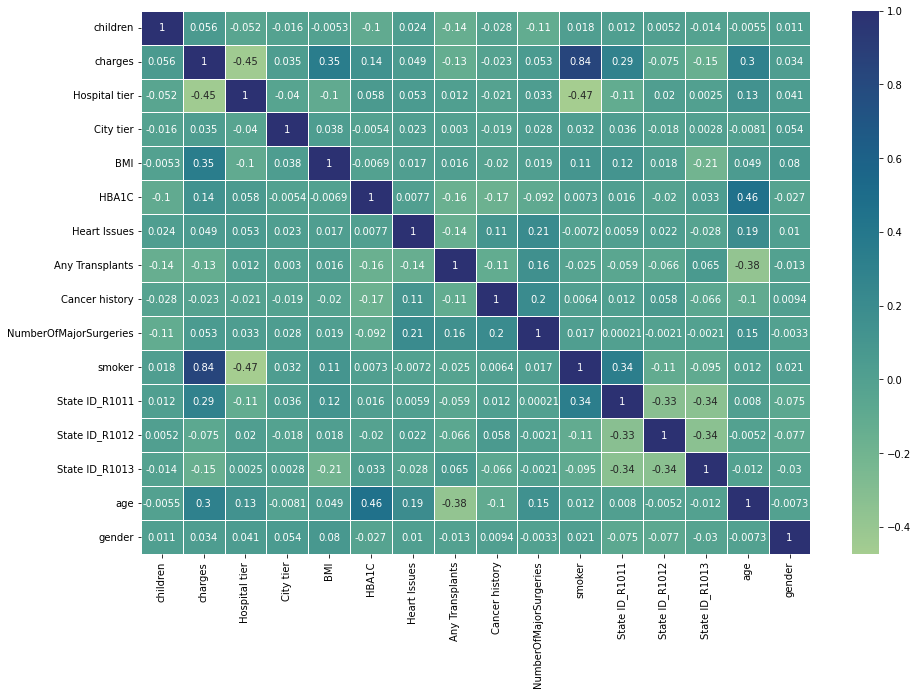

In [211]:
plt.figure(figsize = (15,10))
sns.heatmap(corr, annot = True, linewidth = 0.5, cmap = "crest")
plt.show()

From the above corelation its clear that somker variable is highly corealted to the output variable.

#2. Develop and evaluate the final model using regression with a stochastic gradient descent optimizer. Also, ensure that you apply all the following suggestions:

Note:
• Perform the stratified 5-fold cross-validation technique for model building and validation • Use standardization and hyperparameter tuning effectively • Use sklearn-pipelines • Use appropriate regularization techniques to address the bias-variance trade-off

#a. Create five folds in the data, and introduce a variable to identify the folds
#b. For each fold, run a for loop and ensure that 80 percent of the data is used to train the model and the remaining 20 percent is used to validate it in each iteration
#c. Develop five distinct models and five distinct validation scores (root mean squared error values)
#d. Determine the variable importance scores, and identify the redundant variables

In [212]:
# seperate the input and output data
x = final_df.drop(["charges"], axis = 1)
y = final_df[['charges']]

In [213]:
#split the data set into the training and testing data
from sklearn.model_selection import train_test_split

In [214]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = .20, random_state = 10)

In [215]:
#now standardize the data
from sklearn.preprocessing import StandardScaler

In [216]:
sc = StandardScaler()

In [217]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [218]:
from sklearn.linear_model import SGDRegressor

In [219]:
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,0.3,0.4,0.5,
                   0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,
                   9.0,10.0,20,50,100,500,1000],
         'penalty': ['l2', 'l1', 'elasticnet']}

sgd = SGDRegressor()

# Cross Validation 
folds = 5
model_cv = GridSearchCV(estimator = sgd,
                       param_grid = params,
                       scoring = 'neg_mean_absolute_error',
                       cv = folds,
                       return_train_score = True,
                       verbose = 1)
model_cv.fit(x_train,y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


GridSearchCV(cv=5, estimator=SGDRegressor(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [220]:
model_cv.best_params_

{'alpha': 100, 'penalty': 'l1'}

In [221]:
sgd = SGDRegressor(alpha = 100, penalty ='l1')

In [222]:
sgd.fit(x_train, y_train)

SGDRegressor(alpha=100, penalty='l1')

In [223]:
sgd.score(x_test, y_test)

0.8605114418923436

In [224]:
y_pred = sgd.predict(x_test)

In [225]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [229]:
sgd_mae = mean_absolute_error(y_test, y_pred)
sgd_mse = mean_squared_error(y_test, y_pred)
sgd_rmse = sgd_mse*(1/2.0)

In [231]:
print("MAE:", sgd_mae)
print("MSE:", sgd_mse)
print("RMSE:", sgd_rmse)

MAE: 3121.939129506432
MSE: 23462800.975690357
RMSE: 11731400.487845179


In [232]:
# d. Determine the variable importance scores, and identify the redundant variables
importance = sgd.coef_

In [233]:
pd.DataFrame(importance, index = x.columns, columns=['Feature_imp'])


,Feature_imp
children,397.330288
Hospital tier,-1129.799556
City tier,0.000000
BMI,2680.981086
HBA1C,67.699745
Heart Issues,0.000000
Any Transplants,0.000000
Cancer history,39.602807
NumberOfMajorSurgeries,0.000000
smoker,8820.357433


#3. Use random forest and extreme gradient boosting for cost prediction, share your crossvalidation results, and calculate the variable importance scores


Random Forest

In [234]:
from sklearn.ensemble import RandomForestRegressor


In [235]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [236]:
score = rf.score(x_test,y_test)
score

0.9222696338245824

In [237]:
y_pred = rf.predict(x_test)

In [238]:
rf_mae = mean_absolute_error(y_test, y_pred)


In [239]:
rf_mae


1870.3529629462323

#extreme gradient boosting


In [240]:
from sklearn.ensemble import GradientBoostingRegressor


In [241]:
# Instantiate model with 1000 decision trees
gbr = GradientBoostingRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
gbr.fit(x_train, y_train)

GradientBoostingRegressor(n_estimators=1000, random_state=42)

In [242]:
score = gbr.score(x_test,y_test)
score

0.9042734212625119

In [243]:
y_pred = gbr.predict(x_test)


In [244]:
gbr_mae = mean_absolute_error(y_test, y_pred)
gbr_mae

2375.8700944163274

#4. Case scenario:

Estimate the cost of hospitalization for Christopher, Ms. Jayna (her date of birth is 12/28/1988, height is 170 cm, and weight is 85 kgs). She lives in a tier-1 city and her state’s State ID is R1011. She lives with her partner and two children. She was found to be nondiabetic (HbA1c = 5.8). She smokes but is otherwise healthy. She has had no transplants or major surgeries. Her father died of lung cancer. Hospitalization costs will be estimated using tier-1 hospitals.

In [274]:
# First we need to calculate the age of the person.
date = str(19881228)
date1 = pd.to_datetime(date, format = "%Y%m%d")

In [275]:
current_date = dt.datetime.now()
current_date

datetime.datetime(2023, 3, 13, 4, 59, 1, 815560)

In [276]:
age = (current_date - date1)
age

Timedelta('12493 days 04:59:01.815560')

In [277]:
age = int(12421/365)
age

34

In [278]:
# now with the help of height and weight we will calculate the BMI.
height_m = 170/100
height_sq = height_m*height_m
BMI = 85/height_sq
np.round(BMI,2)

29.41

In [279]:
# Now lets gen
list = [[2,1,1,24.41,5.8,0,0,0,0,1,1,0,0,34,0]]

In [280]:
df = pd.DataFrame(list, columns = ['children', 'Hospital tier', 'City tier', 'BMI', 'HBA1C','Heart Issues', 'Any Transplants', 
                              'Cancer history','NumberOfMajorSurgeries', 'smoker', 'State_ID_R1011', 'State_ID_R1012',
                              'State_ID_R1013', 'age', 'gender'] )
df


,children,Hospital tier,City tier,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,State_ID_R1011,State_ID_R1012,State_ID_R1013,age,gender
0,2,1,1,24.41,5.8,0,0,0,0,1,1,0,0,34,0


#5. Find the predicted hospitalization cost using all models. The predicted value should be the mean of the five models' predicted values.

In [281]:
Hospital_cost = []


In [282]:
# Now lets predict the hospitalization cost through SGDRegressor
Cost1 = sgd.predict(df)
Hospital_cost.append(Cost1)

In [283]:
# Now lets predict the hospitalization cost through Random Forest
Cost2 = rf.predict(df)
Hospital_cost.append(Cost2)

In [284]:
# Now lets predict the hospitalization cost throug Extreme gradient Booster
Cost3 = gbr.predict(df)
Hospital_cost.append(Cost3)

In [285]:
avg_cost = np.mean(Hospital_cost)
avg_cost

104369.11978100664

#So in the new case the avg predicted hospitalization cost is 104369.11